<a href="https://colab.research.google.com/github/Sudheer417/Minor_Project/blob/master/Last_Amazon_Fine_Food_Reviews.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import nltk        # nltk -- Natural Language tool kit--- Library which is used for NLP processing
import matplotlib.pyplot as plt

In [ ]:
df=pd.read_csv('/content/drive/My Drive/python basics/Reviews.csv')
df

,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text
0,1,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1,1,5,1303862400,Good Quality Dog Food,I have bought several of the Vitality canned d...
1,2,B00813GRG4,A1D87F6ZCVE5NK,dll pa,0,0,1,1346976000,Not as Advertised,Product arrived labeled as Jumbo Salted Peanut...
2,3,B000LQOCH0,ABXLMWJIXXAIN,"Natalia Corres ""Natalia Corres""",1,1,4,1219017600,"""Delight"" says it all",This is a confection that has been around a fe...
3,4,B000UA0QIQ,A395BORC6FGVXV,Karl,3,3,2,1307923200,Cough Medicine,If you are looking for the secret ingredient i...
4,5,B006K2ZZ7K,A1UQRSCLF8GW1T,"Michael D. Bigham ""M. Wassir""",0,0,5,1350777600,Great taffy,Great taffy at a great price. There was a wid...
...,...,...,...,...,...,...,...,...,...,...
568449,568450,B001EO7N10,A28KG5XORO54AY,Lettie D. Carter,0,0,5,1299628800,Will not do without,Great for sesame chicken..this is a good if no...
568450,568451,B003S1WTCU,A3I8AFVPEE8KI5,R. Sawyer,0,0,2,1331251200,disappointed,I'm disappointed with the flavor. The chocolat...
568451,568452,B004I613EE,A121AA1GQV751Z,"pksd ""pk_007""",2,2,5,1329782400,Perfect for our maltipoo,"These stars are small, so you can give 10-15 o..."
568452,568453,B004I613EE,A3IBEVCTXKNOH,"Kathy A. Welch ""katwel""",1,1,5,1331596800,Favorite Training and reward treat,These are the BEST treats for training and rew...


In [ ]:
# Deleting Unnecessary Columns
df.drop(['Id' , 'ProductId' , 'UserId' , 'ProfileName' , 'HelpfulnessNumerator' , 'HelpfulnessDenominator' , 'Time' , 'Text'] , axis = 1 , inplace = True)

In [ ]:
df.head()

,Score,Summary
0,5,Good Quality Dog Food
1,1,Not as Advertised
2,4,"""Delight"" says it all"
3,2,Cough Medicine
4,5,Great taffy


In [ ]:
df.nunique()

Score           5
Summary    295742
dtype: int64

In [ ]:
df.dropna(axis=0, inplace=True)

In [ ]:
# Changing the column names..
df.rename(columns= {"Score" : "Ratings" , "Summary" : "Reviews"}, inplace = True)
df.head()

,Ratings,Reviews
0,5,Good Quality Dog Food
1,1,Not as Advertised
2,4,"""Delight"" says it all"
3,2,Cough Medicine
4,5,Great taffy


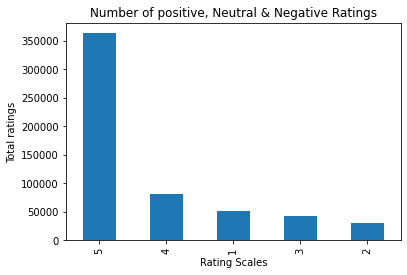

In [ ]:
# Bar plot
df.Ratings.value_counts().plot(kind = "bar")
plt.title('Number of positive, Neutral & Negative Ratings')
plt.xlabel('Rating Scales')
plt.ylabel('Total ratings')
plt.show()

**Extracting Sentiments**

In our datset, The values for Ratings column varies on a scale of 1-5, where 1 being the **worst** review and 5 being the **Best** review. As we predicting Sentiments from the dataset We will **ignore** all reviews with rating=3, since they tend to have neutral sentiment.

In [ ]:
# Count of Reviews except rating = 3
df = df[df['Ratings'] != 3]
len(df)

525789

Now, we'll assign reviews with a rating of 4 or higher to be Positive reviews, while the ones with rating of 2 or lower are Negative and Omit the rating of 3

In [ ]:
# Adding Sentiment column to the dataset based on ratings..
df['Sentiment'] = df['Ratings'].apply(lambda Ratings: "Positive" if Ratings > 3 else "Negative")
df.head()

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,Ratings,Reviews,Sentiment
0,5,Good Quality Dog Food,Positive
1,1,Not as Advertised,Negative
2,4,"""Delight"" says it all",Positive
3,2,Cough Medicine,Negative
4,5,Great taffy,Positive


In [ ]:
df['Sentiment'].value_counts()

Positive    443777
Negative     82012
Name: Sentiment, dtype: int64

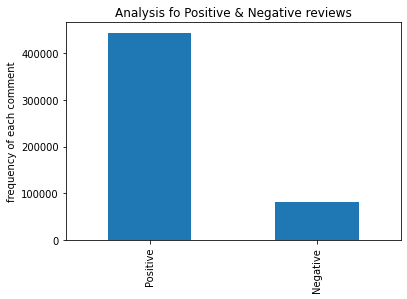

In [ ]:
# Bar plot for positive and negative Reviews
df['Sentiment'].value_counts().plot(kind ="bar")
plt.title("Analysis fo Positive & Negative reviews")
plt.ylabel("frequency of each comment") 
plt.show()

In [ ]:
# Lenth of each review
length = df.Reviews.apply(len)
length

0         21
1         17
2         21
3         14
4         11
          ..
568449    19
568450    12
568451    24
568452    34
568453    11
Name: Reviews, Length: 525789, dtype: int64

In [ ]:
# Adding length column to the Dataset
df = pd.concat([df , length] , axis = 1)
df.head()

,Ratings,Reviews,Sentiment,Reviews
0,5,Good Quality Dog Food,Positive,21
1,1,Not as Advertised,Negative,17
2,4,"""Delight"" says it all",Positive,21
3,2,Cough Medicine,Negative,14
4,5,Great taffy,Positive,11


In [ ]:
df.columns.values[3] = "Length"
df.head()

,Ratings,Reviews,Sentiment,Length
0,5,Good Quality Dog Food,Positive,21
1,1,Not as Advertised,Negative,17
2,4,"""Delight"" says it all",Positive,21
3,2,Cough Medicine,Negative,14
4,5,Great taffy,Positive,11


In [ ]:
from nltk.corpus import stopwords
# Stopwords -- The words which do not contain any particular meaning in the Dataset

In [ ]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [ ]:
# List of Stop words in English
stopwords.words("english")

['i',
 'me',
 'my',
 'myself',
 'we',
 'our',
 'ours',
 'ourselves',
 'you',
 "you're",
 "you've",
 "you'll",
 "you'd",
 'your',
 'yours',
 'yourself',
 'yourselves',
 'he',
 'him',
 'his',
 'himself',
 'she',
 "she's",
 'her',
 'hers',
 'herself',
 'it',
 "it's",
 'its',
 'itself',
 'they',
 'them',
 'their',
 'theirs',
 'themselves',
 'what',
 'which',
 'who',
 'whom',
 'this',
 'that',
 "that'll",
 'these',
 'those',
 'am',
 'is',
 'are',
 'was',
 'were',
 'be',
 'been',
 'being',
 'have',
 'has',
 'had',
 'having',
 'do',
 'does',
 'did',
 'doing',
 'a',
 'an',
 'the',
 'and',
 'but',
 'if',
 'or',
 'because',
 'as',
 'until',
 'while',
 'of',
 'at',
 'by',
 'for',
 'with',
 'about',
 'against',
 'between',
 'into',
 'through',
 'during',
 'before',
 'after',
 'above',
 'below',
 'to',
 'from',
 'up',
 'down',
 'in',
 'out',
 'on',
 'off',
 'over',
 'under',
 'again',
 'further',
 'then',
 'once',
 'here',
 'there',
 'when',
 'where',
 'why',
 'how',
 'all',
 'any',
 'both',
 'each

In [ ]:
# List of Punctuation marks
import string
string.punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [ ]:
# Creating a function in order to get list of clean textwords

In [ ]:
# Visualization
!pip install wordcloud

In [ ]:
from wordcloud import WordCloud, STOPWORDS

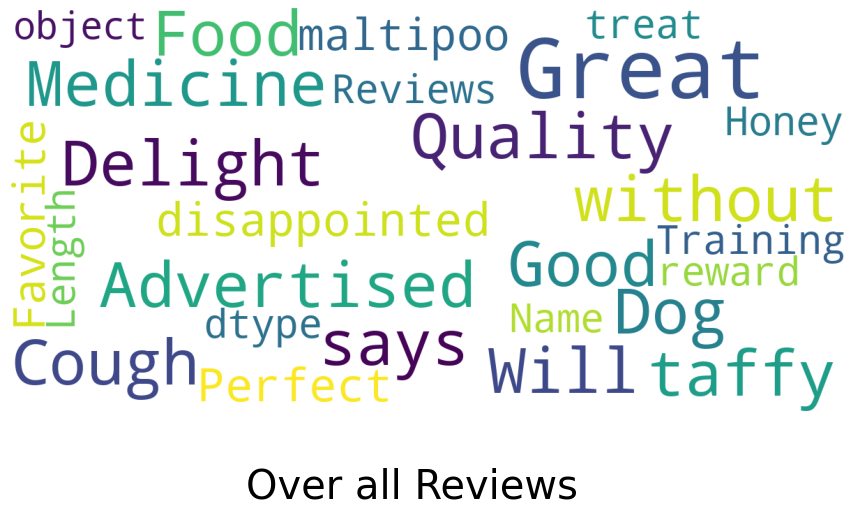

In [ ]:
# Wordcloud for Overall Reviews
stopwords = set(STOPWORDS)
def Mywordcloud(data, title = None):
  wordcloud = WordCloud(
      background_color = 'white',
      stopwords = stopwords,
      max_words = 200,
      max_font_size = 40,
      scale = 3,
      random_state = 1
  ).generate(str(data))

  fig = plt.figure(1, figsize = (15,15))
  plt.axis('off')
  if title:
    fig.suptitle(title, fontsize=40)
    fig.subplots_adjust(top=2.3)

  plt.imshow(wordcloud)
  plt.show()


Mywordcloud(df['Reviews'].dropna(), 'Over all Reviews')

In [ ]:
df_positive = df[df.Sentiment == 'Positive']
df_positive.head()

,Ratings,Reviews,Sentiment,Length
0,5,Good Quality Dog Food,Positive,21
2,4,"""Delight"" says it all",Positive,21
4,5,Great taffy,Positive,11
5,4,Nice Taffy,Positive,10
6,5,Great! Just as good as the expensive brands!,Positive,45


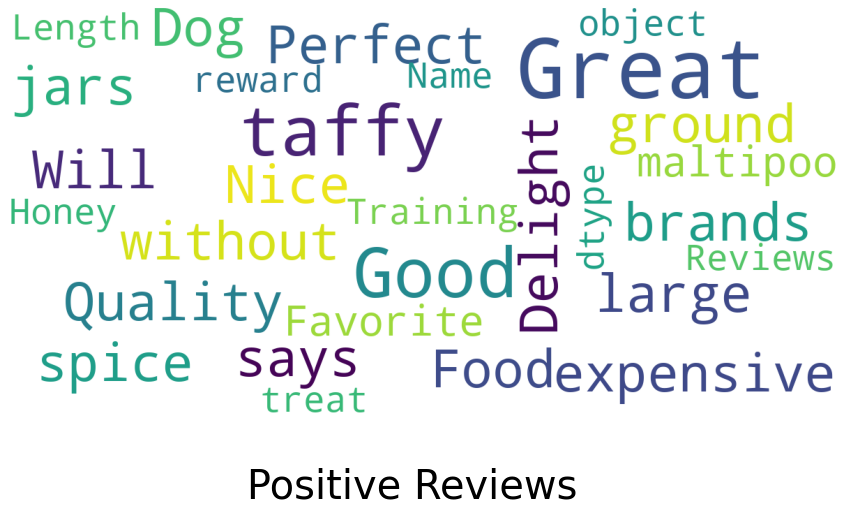

In [ ]:
# Wordcloud for Positive Reviews
Mywordcloud(df_positive['Reviews'].dropna(), 'Positive Reviews')

In [ ]:
df_negative = df[df.Sentiment == 'Negative']
df_negative.head()

,Ratings,Reviews,Sentiment,Length
1,1,Not as Advertised,Negative,17
3,2,Cough Medicine,Negative,14
12,1,My Cats Are Not Fans of the New Food,Negative,36
16,2,poor taste,Negative,10
26,1,Nasty No flavor,Negative,15


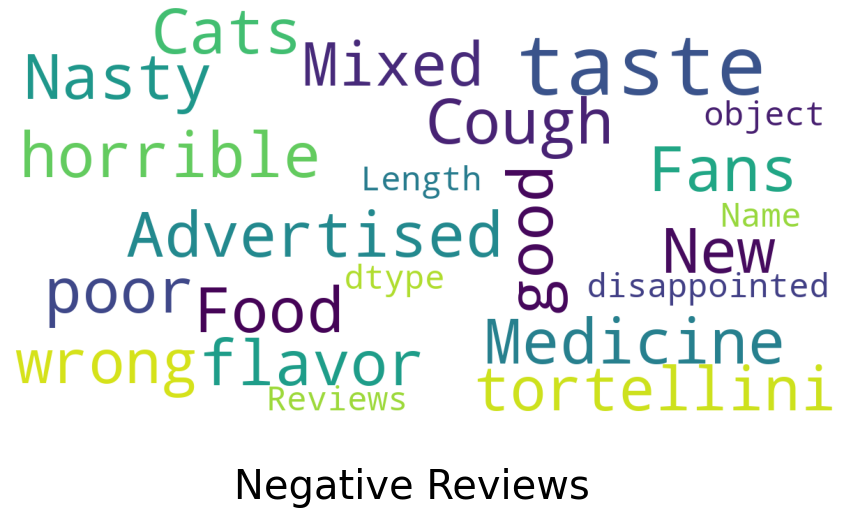

In [ ]:
# Wordcloud for Negative Reviews
Mywordcloud(df_negative['Reviews'].dropna(), 'Negative Reviews')

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer
bow_transformer =  CountVectorizer(analyzer = 'word').fit(df["Reviews"])

In [ ]:
# How many times a particular word is repeated...
bow_transformer.vocabulary_

{'good': 12320,
 'quality': 22768,
 'dog': 8639,
 'food': 11163,
 'not': 19507,
 'as': 1950,
 'advertised': 932,
 'delight': 7856,
 'says': 24703,
 'it': 14861,
 'all': 1225,
 'cough': 6773,
 'medicine': 17756,
 'great': 12619,
 'taffy': 27954,
 'nice': 19282,
 'just': 15321,
 'the': 28499,
 'expensive': 10113,
 'brands': 3774,
 'wonderful': 31402,
 'tasty': 28173,
 'yay': 31721,
 'barley': 2582,
 'healthy': 13339,
 'best': 3021,
 'hot': 13910,
 'sauce': 24644,
 'in': 14358,
 'world': 31491,
 'my': 18924,
 'cats': 4879,
 'love': 16839,
 'this': 28617,
 'diet': 8217,
 'better': 3046,
 'than': 28479,
 'their': 28521,
 'regular': 23399,
 'are': 1810,
 'fans': 10369,
 'of': 19866,
 'new': 19243,
 'fresh': 11429,
 'and': 1503,
 'greasy': 12618,
 'strawberry': 27206,
 'twizzlers': 29592,
 'yummy': 32004,
 'lots': 16813,
 'what': 31061,
 'you': 31856,
 'expect': 10089,
 'poor': 21833,
 'taste': 28129,
 'sweet': 27795,
 'candy': 4547,
 'home': 13732,
 'delivered': 7884,
 'twizlers': 29590,
 'a

In [ ]:
# Unique Words Count...
print(len(bow_transformer.vocabulary_))


32205


In [ ]:
# I/P and O/P
x=df.iloc[:,1].values
y=df.iloc[:,2].values

In [ ]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.3,random_state = 0)

In [ ]:
x_train.shape

(368052,)

In [ ]:
x_test.shape

(157737,)

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer()
ctmTr = cv.fit_transform(x_train)
x_test_dtm = cv.transform(x_test)

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
model = LogisticRegression()
model.fit(ctmTr, y_train)

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [ ]:
y_pred = model.predict(x_test_dtm)
y_pred

array(['Positive', 'Positive', 'Positive', ..., 'Positive', 'Positive',
       'Positive'], dtype=object)

In [ ]:
y_test

array(['Positive', 'Positive', 'Positive', ..., 'Positive', 'Positive',
       'Positive'], dtype=object)

In [ ]:
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report

In [ ]:
accuracy_score(y_pred,y_test)*100

92.51792540748207

In [ ]:
confusion_matrix(y_pred,y_test)

array([[ 16234,   3419],
       [  8383, 129701]])

In [ ]:
print(classification_report(y_pred,y_test))

              precision    recall  f1-score   support

    Negative       0.66      0.83      0.73     19653
    Positive       0.97      0.94      0.96    138084

    accuracy                           0.93    157737
   macro avg       0.82      0.88      0.84    157737
weighted avg       0.94      0.93      0.93    157737



In [ ]:
y1 = cv.transform(['Not as Advertised'])
y1 = model.predict(y1)
y1

array(['Negative'], dtype=object)

In [ ]:
y1 = cv.transform(['Horrible taste'])
y1 = model.predict(y1)
y1

array(['Negative'], dtype=object)

In [ ]:
y1 = cv.transform(['Nasty No flavor'])
y1 = model.predict(y1)
y1

array(['Negative'], dtype=object)

In [ ]:
y1 = cv.transform(['Great! Just as good as the expensive brands!	'])
y1 = model.predict(y1)
y1

array(['Positive'], dtype=object)